In [18]:
install.packages("MASS")
library("MASS")
install.packages("ggplot2")
library("ggplot2")


  There is a binary version available but the source version is later:
     binary source needs_compilation
MASS 7.3-54 7.3-55              TRUE

  Binaries will be installed


Warning message:
"package 'MASS' is in use and will not be installed"


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [20]:
R.version.string

[1] "R version 3.6.1 (2019-07-05)"

In [12]:
workingCats <- cats
workingCats
#cats
#table(cats$Female)

Sex,Bwt,Hwt
F,2.0,7.0
F,2.0,7.4
F,2.0,9.5
F,2.1,7.2
F,2.1,7.3
F,2.1,7.6
F,2.1,8.1
F,2.1,8.2
F,2.1,8.3
F,2.1,8.5


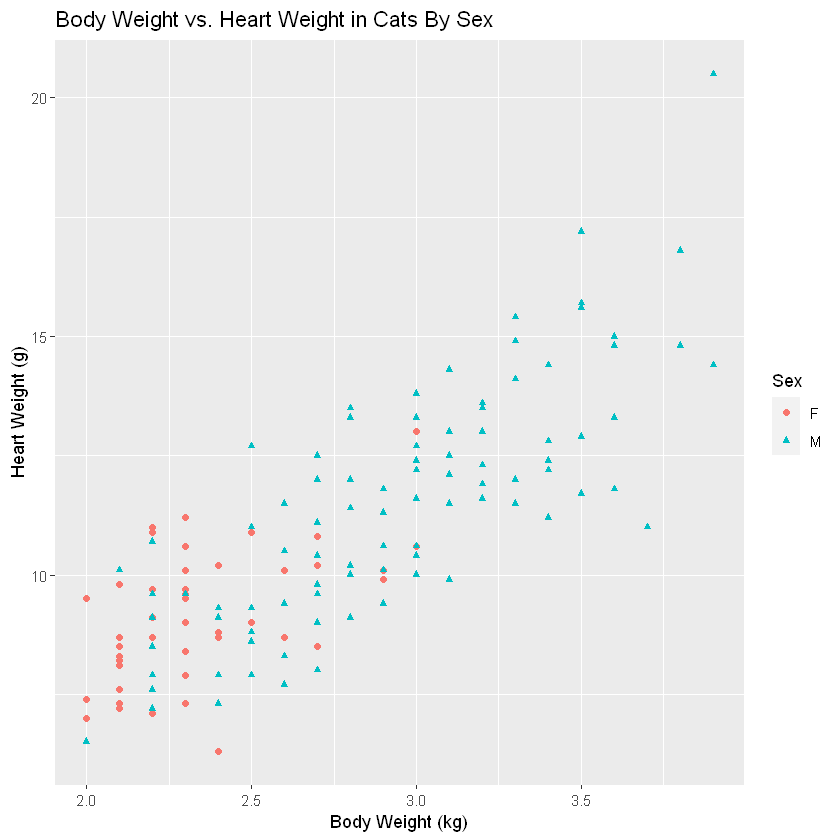

In [15]:
catPlot <- ggplot(data =workingCats, aes(x= Bwt, y=Hwt))+
geom_point(aes(shape = Sex, color =Sex)) + labs(x="Body Weight (kg)",y="Heart Weight (g)",
               title="Body Weight vs. Heart Weight in Cats By Sex")

catPlot

#catPlotBase <- plot(workingCats$Bwt, workingCats$Hwt, 
#     xlab = "Body Weight",
#     ylab = "Heart Weight",
#     main = "Body Weight vs. Heart Weight in Cats",
#     pch = 20,
#     col = workingCats$Sex)

In [1]:
cat1<-lm(Hwt ~ Bwt + Female, workingCats)
cat2<-lm(Hwt ~ Bwt + Female + Female:Bwt, workingCats)
summary(cat1)
summary(cat2)
pred1 <-predict(cat1)
pred2 <- predict(cat2)


ERROR: Error in is.data.frame(data): object 'workingCats' not found


The linear equation for the above fitted model is: 

Hwt= -1.18 + 4.30×bwt+4.1654×Female-1.68×bwtxFemale.

In the above fitted model, all of the predictor variables are signficant. Bwt, Sex (denoted by the binary variable Female), and the interaction of Bwt and Female. Initially I built a model that only looked at the main effects (Bwt and Female), and this model only showed that Bwt was a significant predictor of Hwt. This seems unlikely based on the scatterplot which shows that males generally have higher body weights and heart rates. So I built a model that included both main effects and the interaction of the main effects. This showed that while Bwt is the most signficant predictor of heart weight, sex (based on Female binary variable) and the interaction of Bwt and sex are both signficant predictors of heart weight.

The coefficients show that for every unit increase in Hwt Bwt would increase by 4.3 grams. Analyzing coefficients for the Female variable is difficult because it is binary and not a continuous variable. Interestingly,the interaction of Bwt and Female has a negative impact on body weight, accounting for a -1.68g decrease in Hwt.

The coefficient of determination (R-squared) is 0.6493, meaning this model accounts for about 65% of behavior in Hwt. This isn't a particularly high R-squared, but we can only work with the data we are given. If the researchers included other variables that may contribute to heart weight (ie. subcutaneous fat measurements) we may have more explanatory measurements to improve our model performance. We also have a large F-statistic (89.24) and a large sample size (about 150 cats) so it is safe to say that there is a relationship between our predictor variables (Bwt, Female, Bwt:Female) and our response variable (Hwt).



In [73]:
cat3 <- lm(Hwt ~ Bwt + Female + Female:Bwt, workingCats)
Bwt <- c(3.4)
Female <- c(1)
SigmaWeight <- data.frame(Bwt,Female)
SigmaWeight

#using the fitted model to predict the value for Sigma's weight
predict(cat3, newdata = SigmaWeight)


Bwt,Female
3.4,1


1 
11.94512

In [104]:
maleCat <- subset(workingCats, Female == 0,
select=c(Bwt, Female))

femaleCat <- subset(workingCats, Female == 1,
select=c(Bwt, Female))

cat3 <- lm(Hwt ~ Bwt + Female + Female:Bwt, workingCats)


#using the fitted model to predict the value for Sigma's weight
malePred<- predict(cat3, newdata = maleCat)
#plot(malePred)
femalePred <- predict(cat3, newdata = femaleCat)
#plot(femalePred)

catPlot <- ggplot(data =workingCats, aes(x= Bwt, y=Hwt))+
geom_point(aes(shape = Sex, color =Sex)) +     geom_line(malePred, color="red") + 
    geom_line(femalePred, color="blue") +labs(x="Body Weight (kg)",y="Heart Weight (g)",
               title="Body Weight vs. Heart Weight in Cats By Sex")




ERROR: Error: `mapping` must be created by `aes()`


In [108]:
library(MASS)
cars1 <-Cars93
aggregate(cars1$Length, by=list(cars1$AirBags, cars1$Man.trans.avail), FUN = mean, na.action = TRUE)


Group.1,Group.2,x
Driver & Passenger,No,197.5000
Driver only,No,197.8750
None,No,191.3750
Driver & Passenger,Yes,189.0000
Driver only,Yes,178.0370
None,Yes,170.8462


In [42]:
summary(lm(Length ~ Man.trans.avail*AirBags, cars1))



Call:
lm(formula = Length ~ Man.trans.avail * AirBags, data = cars1)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.846  -5.875   1.963   6.154  24.154 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            197.500      3.605  54.789   <2e-16 ***
Man.trans.availYes                      -8.500      5.098  -1.667   0.0990 .  
AirBagsDriver only                       0.375      4.415   0.085   0.9325    
AirBagsNone                             -6.125      5.098  -1.201   0.2328    
Man.trans.availYes:AirBagsDriver only  -11.338      6.028  -1.881   0.0633 .  
Man.trans.availYes:AirBagsNone         -12.029      6.556  -1.835   0.0700 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.2 on 87 degrees of freedom
Multiple R-squared:  0.539,	Adjusted R-squared:  0.5125 
F-statistic: 20.34 on 5 and 87 DF,  p-value: 2.159e-13


                    
                     No Yes
  Driver & Passenger  8   8
  Driver only        16  27
  None                8  26

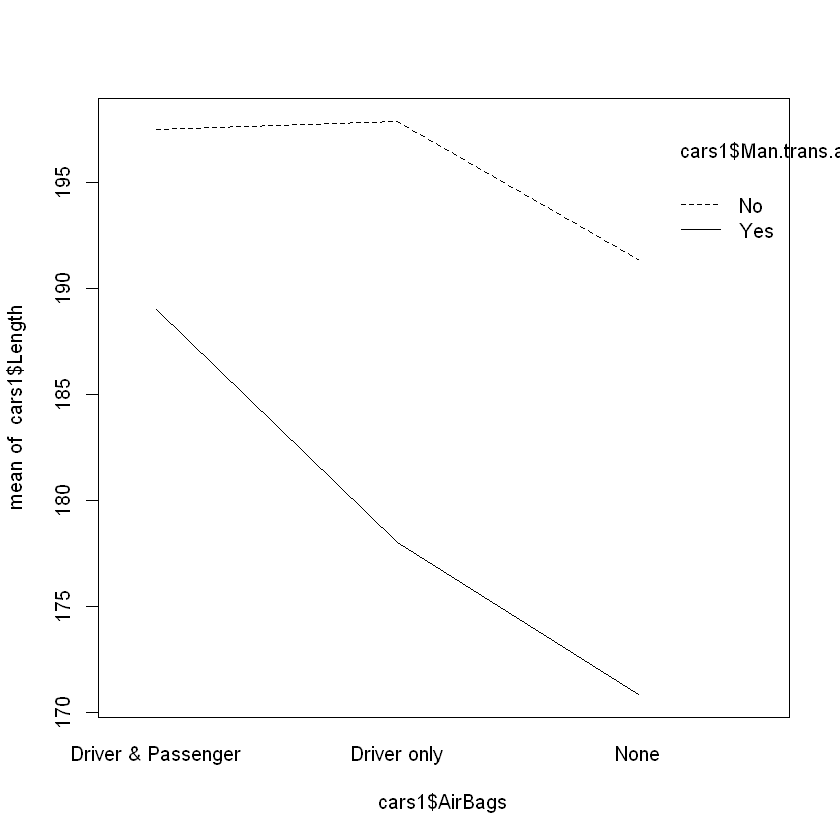

In [109]:
interaction.plot(cars1$AirBags,cars1$Man.trans.avail, cars1$Length, fun = mean,
                 type = c("l", "p", "b", "o", "c"), legend = TRUE)

table(cars1$AirBags, cars1$Man.trans.avail)

Based on the above interaction plot, there is little to no intereaction between the position of the airbags in the car and whether a manual transmission is avaiable on the length of the vehicle. While these lines aren't completely parallel, they do not overlap or intersect, so whatever interaction may be present is very weak. It's worth pointing out that the data for this two way ANOVA has unequal sample sizes which could impact the robustness of these results.

In [106]:
carStuff<-(aov(Length ~ AirBags*Man.trans.avail, data=cars1))
summary(carStuff)
confint(carStuff)

                        Df Sum Sq Mean Sq F value   Pr(>F)    
AirBags                  2   3752    1876  18.048 2.78e-07 ***
Man.trans.avail          1   6388    6388  61.447 1.05e-11 ***
AirBags:Man.trans.avail  2    433     217   2.084    0.131    
Residuals               87   9044     104                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,2.5 %,97.5 %
(Intercept),190.335172,204.6648284
AirBagsDriver only,-8.400087,9.1500869
AirBagsNone,-16.257598,4.0075976
Man.trans.availYes,-18.632598,1.6325976
AirBagsDriver only:Man.trans.availYes,-23.319082,0.6431563
AirBagsNone:Man.trans.availYes,-25.059564,1.0018719


The main effects of the fitted two-way ANOVA show that the main effects (Air Bags and Transmission availability) are very significant meaning that these two groups are statistically different from each other when it comes to length. The interaction of these two variables is above .05 and is not statistically significant. Although, all of the confidence intervals for this model contain zero, meaning that the results the results differences in the lengths of cars in these groups is not significant. 